In [1]:
library(IBMPopSim)
library(ggplot2)


Attaching package: ‘IBMPopSim’


The following object is masked from ‘package:stats’:

    stepfun




In [2]:
#update.packages(checkBuilt=TRUE, ask=FALSE)
#install.packages("Rcpp")
#install.packages("IBMPopSim")
#install.packages("devtools")
#install.packages("IRkernel")
#IRkernel::installspec()

In [18]:
pop_init <- data.frame("birth"=rep(0,10), "death"=rep(NA,10), "smurfness"=rep(0,10))
params <- list("a" = 0.015,
               "b" = -0.09,
               "k_int" = 0.19,
               "compet" = 0.00009)


In [4]:
death_event <- mk_event_individual(name = "death1", type = "death",
    intensity_code = 'if (I.smurfness==0)
            result = 0;
        else
            result = k_int;'
)

In [5]:
death_event2 <- mk_event_interaction(name = "death2", type = "death", 
    interaction_code = 'result = compet;'
)                                     

In [13]:
birth_event <- mk_event_individual(type="birth",
    intensity_code = 'if (I.smurfness==0)
            result = 1;
        else
            result = 1/15;',
    kernel_code = 'newI.smurfness=0;'
)

In [7]:
swap_event <- mk_event_interaction(
    type = "swap",
    interaction_code = 'if (I.smurfness==0)
                result = (a*age(I,t)+b)*(1-compet);
            else
                result = 0;',
    kernel_code = 'I.smurfness=1;'
)

In [14]:
model <- mk_model(
    characteristics = get_characteristics(pop_init),
    events = list(death_event, death_event2, swap_event, birth_event),
    parameters = params,
    with_id = TRUE) #adds individuals IDs

summary(model)

[1] "add 'id' as individual attributes"
Events:
#1: individual event of type death
#2: interaction event of type death
#3: interaction event of type swap
#4: individual event of type birth
--------------------------------------- 
Individual description:
names:  birth death smurfness id 
R types:  double double double integer 
C types:  double double double int
--------------------------------------- 
R parameters available in C++ code:
names:  a b k_int compet 
R types:  double double double double 
C types:  double double double double

In [15]:
death_max <- params$k_int
swap_max <- (params$a*50+params$b)*(1-params$compet)

In [19]:
T = 0:10 # Simulation end time 


sim_out <- popsim(model = model, age_max = 10,
  population = pop_init,
  events_bounds = c('death1'=death_max,'death2'=params$compet, 'swap'= swap_max, 'birth'= 1),
  parameters = params,
  time = T)

[1] "Add 'id' attributes to the population."
Simulation on  [0, 1]  [1, 2]  [2, 3]  [3, 4]  [4, 5]  [5, 6]  [6, 7]  [7, 8]  [8, 9]  [9, 10] 

In [37]:
pop_out <- merge_pop_withid(sim_out$population)[1001:2000,]
head(pop_out)
tail(pop_out)

,id,birth,death,smurfness_1,smurfness_2,smurfness_3,smurfness_4,smurfness_5,smurfness_6,smurfness_7,⋯,smurfness_91,smurfness_92,smurfness_93,smurfness_94,smurfness_95,smurfness_96,smurfness_97,smurfness_98,smurfness_99,smurfness_100
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1001,260,0,6.871230,NA,NA,NA,NA,NA,NA,1,⋯,1,1,1,1,1,1,1,1,1,1
1002,284,0,6.469947,NA,NA,NA,NA,NA,NA,1,⋯,1,1,1,1,1,1,1,1,1,1
1003,38,0,7.423327,NA,NA,NA,NA,NA,NA,NA,⋯,1,1,1,1,1,1,1,1,1,1
1004,754,0,7.399494,NA,NA,NA,NA,NA,NA,NA,⋯,1,1,1,1,1,1,1,1,1,1
1005,19,0,8.944277,NA,NA,NA,NA,NA,NA,NA,⋯,1,1,1,1,1,1,1,1,1,1
1006,42,0,8.927357,NA,NA,NA,NA,NA,NA,NA,⋯,1,1,1,1,1,1,1,1,1,1


,id,birth,death,smurfness_1,smurfness_2,smurfness_3,smurfness_4,smurfness_5,smurfness_6,smurfness_7,⋯,smurfness_91,smurfness_92,smurfness_93,smurfness_94,smurfness_95,smurfness_96,smurfness_97,smurfness_98,smurfness_99,smurfness_100
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1995,327,0,45.78456,NA,NA,NA,NA,NA,NA,NA,⋯,1,1,1,1,1,1,1,1,1,1
1996,716,0,45.96929,NA,NA,NA,NA,NA,NA,NA,⋯,1,1,1,1,1,1,1,1,1,1
1997,337,0,46.51725,NA,NA,NA,NA,NA,NA,NA,⋯,1,1,1,1,1,1,1,1,1,1
1998,654,0,47.19744,NA,NA,NA,NA,NA,NA,NA,⋯,1,1,1,1,1,1,1,1,1,1
1999,684,0,49.17535,NA,NA,NA,NA,NA,NA,NA,⋯,1,1,1,1,1,1,1,1,1,1
2000,731,0,55.78500,NA,NA,NA,NA,NA,NA,NA,⋯,1,1,1,1,1,1,1,1,1,1


In [21]:
#mortality per age general pop
pop_final <- sim_out$population[[10]]
#Dx <- death_table(pop_final, 0:100, 0:100)
#Ex <- exposure_table(pop_final, 0:100, 0:100)
all_dead <- pop_final[is.na(pop_final$death)==FALSE,]
dim(all_dead[all_dead$smurfness==1,])[1]/dim(all_dead)[1]

[1] 0.002289417

In [29]:
dim(pop_final)[1]

[1] 1382514

In [22]:
pop_final

id,birth,death,smurfness
<int>,<dbl>,<dbl>,<dbl>
65,1.979202,NA,1
72,2.110562,NA,1
82,2.255422,NA,1
101,2.367356,NA,1
168,2.871140,NA,1
190,2.975911,NA,1
224,3.157307,NA,1
240,3.204916,NA,1
260,3.293001,NA,1


In [57]:
survival <- sapply(1:100, function(i) (Ex[i,i]))

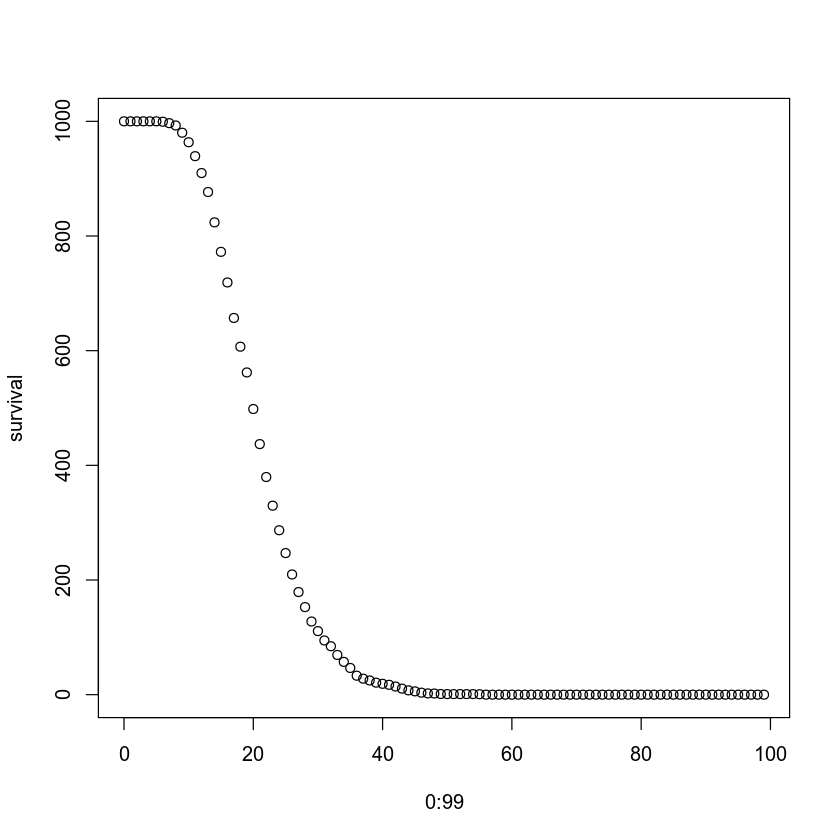

In [61]:
plot(0:99, survival)